In [1]:
import pandas as pd
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import plotly.express as px

In [2]:
py.offline.init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

# Q1

In [4]:
data = {
     'Max': [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
     'Min' : [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df['Index'] = range(1,13)

In [7]:
df = df.set_index('Index')
df

,Max,Min
Index,,
1,39,21
2,41,23
3,43,27
4,47,28
5,49,32
6,51,35
7,45,31
8,38,28
9,37,21


In [8]:
df.iplot(mode='lines+markers',xTitle='Month',yTitle='Temperature')

# Q2.1

In [9]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [10]:
titanic=pd.read_csv(url)

In [11]:
data = {'Female':0,
       'Male':0}
for i in titanic['sex']:
    if i=='female':
        data['Female']+=1
    else:
        data['Male'] +=1

In [12]:
data

{'Female': 466, 'Male': 844}

In [13]:
gender= pd.DataFrame(data,index=[0])
gender

,Female,Male
0,466,844


In [14]:
gender = gender.T
gender

,0
Female,466
Male,844


array([<AxesSubplot:ylabel='0'>], dtype=object)

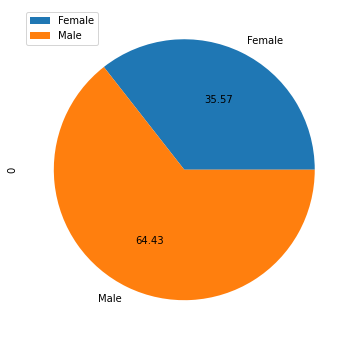

In [15]:
gender.plot.pie(figsize=(6,6),subplots=True,autopct='%.2f')

# Q2.2

In [16]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


### Mismatch in count of  age ,fare,gender cols

In [17]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [18]:
titanic[['sex']].describe()

,sex
count,1309
unique,2
top,male
freq,843


### Thus plotting leads to this error

In [19]:
fig1 = px.scatter(titanic,x='age',y='fare',color='sex')
fig1.show()

KeyError: (nan, '', '', '', '')

### removing index 1309 as entire row is NaN

In [20]:
titanic = titanic.drop(index=1309)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Idea is to convert NaN vals in age of titanic DF to -1 so that we dont loose data and at least  can have a plot
# ---------------------------------------
### Drawing out the nan values in age col

In [21]:
demo = titanic[['age']].fillna('IWASNA')
demo

,age
0,29
1,0.9167
2,2
3,30
4,25
...,...
1304,14.5
1305,IWASNA
1306,26.5
1307,27


### get respective index for NaN values of age col

In [22]:
desiredindex = demo[demo['age']=='IWASNA'].index

In [23]:
desInDf = pd.DataFrame(index=desiredindex)

In [24]:
desInDf.head()

""
15
37
40
46
59


In [25]:
desInDf['age'] = -1
desInDf

,age
15,-1
37,-1
40,-1
46,-1
59,-1
...,...
1293,-1
1297,-1
1302,-1
1303,-1


### convert all NaN vals only in age col to -1 

In [26]:
nanAgeGender = titanic[['age']]

In [27]:
nanAgeGender = nanAgeGender.fillna(desInDf,axis=1)

### overwrite indexes of nanAgeGender in titanicNew thus having NaN val as -1 in orginal DF

In [28]:
titanicNew = titanic #store original titanic DF into titanicNew

In [29]:
titanicNew

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [30]:
nanAgeGender

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,-1.0000
1306,26.5000
1307,27.0000


In [31]:
titanicNew.update(nanAgeGender)

### Verifying that indexes such as 15,37,40,46 which had NaN as val in orginal titanic DF now has -1 

In [32]:
titanicNew.iloc[15:47]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,-1.0,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
16,1.0,0.0,"Baxter, Mr. Quigg Edmond",male,24.0,0.0,1.0,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
17,1.0,1.0,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0.0,1.0,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
18,1.0,1.0,"Bazzani, Miss. Albina",female,32.0,0.0,0.0,11813,76.2917,D15,C,8,NaN,NaN
19,1.0,0.0,"Beattie, Mr. Thomson",male,36.0,0.0,0.0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
20,1.0,1.0,"Beckwith, Mr. Richard Leonard",male,37.0,1.0,1.0,11751,52.5542,D35,S,5,NaN,"New York, NY"
21,1.0,1.0,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1.0,1.0,11751,52.5542,D35,S,5,NaN,"New York, NY"
22,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C,5,NaN,"New York, NY"
23,1.0,1.0,"Bidois, Miss. Rosalie",female,42.0,0.0,0.0,PC 17757,227.5250,NaN,C,4,NaN,NaN
24,1.0,1.0,"Bird, Miss. Ellen",female,29.0,0.0,0.0,PC 17483,221.7792,C97,S,8,NaN,NaN


## Plot age vs fare with color='sex' works fine now

In [33]:
data= titanicNew
fig = px.scatter(data,x='age',y='fare',color='sex')
fig.show()